In [1]:
import sys
import os
import scipy.constants
import glob as glob
import cqws.solver_qws as solver
from cqws.tools import plotstyle

Custom style created and loaded successfully.


Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5388   |   HH1->-0.0050    |   LH1->-0.0132    |
CPU times: user 605 ms, sys: 866 ms, total: 1.47 s
Wall time: 229 ms


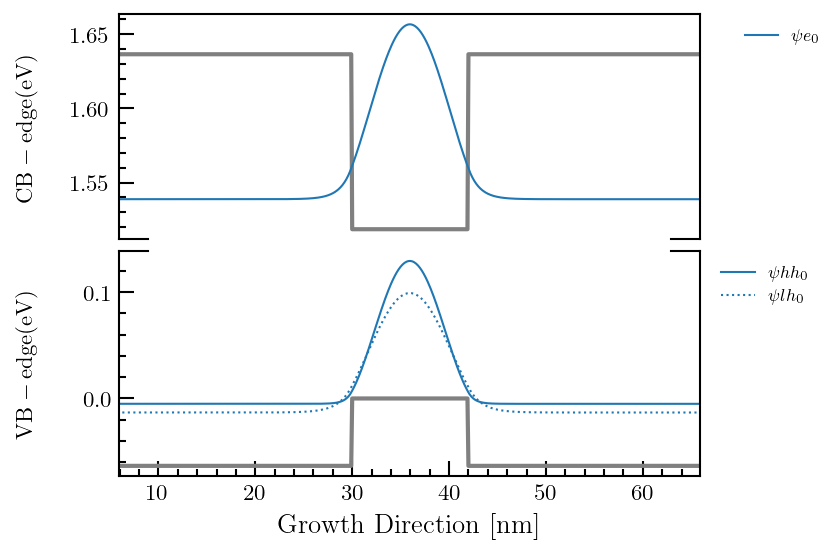

In [2]:
%%time

class Structure(object): pass
s = Structure() # this will be our datastructure
s.structure_name="iico-qws"
# TEMPERATURE
s.T = 12#Kelvin
# Binding Energy
s.HHBinding =6.1e-3 #meV
s.LHBinding =6.8e-3 #meV
# Band Offset ratios
s.Qc = 0.65
s.Qv = 0.35

# Total subband number to be calculated for electrons
s.subbands = 1
# APPLIED ELECTRIC FIELD
s.Fapp = 0e4 # (V/m)

# For 1D, z-axis is choosen
s.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |
s.material =[
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
            [ 12,'GaAs'  ,      0,   0, 'n','Well'],
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]
structure = s
nm = 1e-9
# RUN SIMULATION
model = solver.StructureFrom(structure) #
xaxis=model.xaxis/nm
cb=model.cb
vb=model.vb
results=solver.Solver(model).QuantumSolutions(absolute =True,Print=True)
f = solver.Solver(model).plotting(results,amp=10,axmin=30,axmax=30,eymin =-0.01,eymax=0.01,hymin=-0.2,hymax=-2,save=False);


In [31]:
import numpy as np
subbands =  results.subbands
ene_array = np.zeros((len(results.xaxis),3+subbands))
enhh_array = enlh_array = ene_array
for i in range(3,3+subbands):
    ene_array[:,i]=results.psie[:,i-3]

In [6]:
f.savefig('example.png', bbox_inches='tight', pad_inches=0,transparent=True)


In [9]:

import plotly.express as px
from textwrap import wrap
named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join(f'{c:<10}' for c in named_colorscales), 80)))

aggrnyl   agsunset  blackbody bluered   blues     blugrn    bluyl     brwnyl
bugn      bupu      burg      burgyl    cividis   darkmint  electric  emrld
gnbu      greens    greys     hot       inferno   jet       magenta   magma
mint      orrd      oranges   oryel     peach     pinkyl    plasma    plotly3
pubu      pubugn    purd      purp      purples   purpor    rainbow   rdbu
rdpu      redor     reds      sunset    sunsetdarkteal      tealgrn   turbo
viridis   ylgn      ylgnbu    ylorbr    ylorrd    algae     amp       deep
dense     gray      haline    ice       matter    solar     speed     tempo
thermal   turbid    armyrose  brbg      earth     fall      geyser    prgn
piyg      picnic    portland  puor      rdgy      rdylbu    rdylgn    spectral
tealrose  temps     tropic    balance   curl      delta     oxy       edge
hsv       icefire   phase     twilight  mrybm     mygbm
